In [1]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('day_wise2.csv')
dataset

,Date,Confirmed,Deaths,Recovered,Active,'No. of countries'
0,2020-01-22,555,17,28,510,6
1,2020-01-23,654,18,30,606,8
2,2020-01-24,941,26,36,879,9
3,2020-01-25,1434,42,39,1353,11
4,2020-01-26,2118,56,52,2010,13
...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,187
184,2020-07-24,15791645,639650,8939705,6212290,187
185,2020-07-25,16047190,644517,9158743,6243930,187
186,2020-07-26,16251796,648621,9293464,6309711,187


In [3]:
indexDates = dataset[ (dataset['Date'] != '2020-01-27') & (dataset['Date'] != '2020-02-27') & (dataset['Date'] != '2020-03-27') & (dataset['Date'] != '2020-04-27') & (dataset['Date'] != '2020-05-27') & (dataset['Date'] != '2020-06-27') & (dataset['Date'] != '2020-07-27')].index
dataset.drop(indexDates, inplace = True)
dataset

,Date,Confirmed,Deaths,Recovered,Active,'No. of countries'
5,2020-01-27,2927,82,61,2784,16
36,2020-02-27,82034,2810,31919,47305,51
65,2020-03-27,603066,28318,128508,446240,176
96,2020-04-27,3032850,215511,852382,1964957,184
126,2020-05-27,5699664,357119,2297613,3044932,187
157,2020-06-27,9955597,499268,4981808,4474521,187
187,2020-07-27,16480485,654036,9468087,6358362,187


In [4]:
dataset['Date'] = dataset['Date'].map({'2020-01-27': 1, '2020-02-27': 2, '2020-03-27': 3, '2020-04-27': 4, '2020-05-27': 5, '2020-06-27': 6,'2020-07-27': 7}, na_action=None)
#dataset.rename({'Date':'Month'}, axis = 1)
dataset

,Date,Confirmed,Deaths,Recovered,Active,'No. of countries'
5,1,2927,82,61,2784,16
36,2,82034,2810,31919,47305,51
65,3,603066,28318,128508,446240,176
96,4,3032850,215511,852382,1964957,184
126,5,5699664,357119,2297613,3044932,187
157,6,9955597,499268,4981808,4474521,187
187,7,16480485,654036,9468087,6358362,187


In [25]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 2:3].values

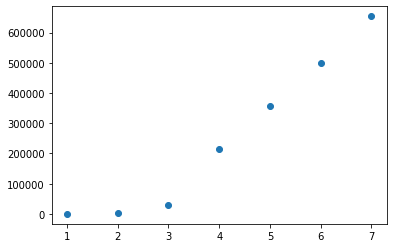

In [32]:
plt.scatter(X, y)
plt.show()

In [33]:
########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.5)
X_train_p

array([[6],
       [1],
       [7]])

In [42]:
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)
X_train_poli

array([[ 1.,  6., 36.],
       [ 1.,  1.,  1.],
       [ 1.,  7., 49.]])

In [ ]:
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)
Y_pred_pr

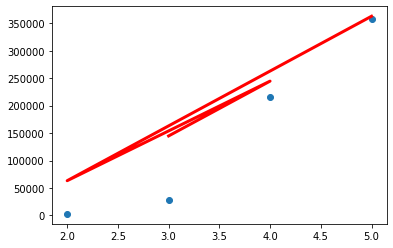

In [44]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()

In [45]:
print('DATOS DEL MODELO REGRESIÓN POLINOMIAL')
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))

DATOS DEL MODELO REGRESIÓN POLINOMIAL
Valor de la pendiente o coeficiente "a":
[[    0.         35751.26666667  9155.13333333]]
Valor de la intersección o coeficiente "b":
[-44824.4]
Precisión del modelo:
1.0
